# Eigen faces using pca 


## We will  use the Labeled Faces "in the Wild" dataset made available through Scikit-Learn:

In [6]:
import os
import numpy as np
from PIL import Image
# pip install pillow
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import fetch_lfw_people # import data set 
faces = fetch_lfw_people(min_faces_per_person=60) 

In [71]:
# data has 1348 image each one consider as a row of flatten 62*47 image pixels (2914)
print(faces.target_names)
print(faces.images.shape)
print(faces.data.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)
(1348, 2914)


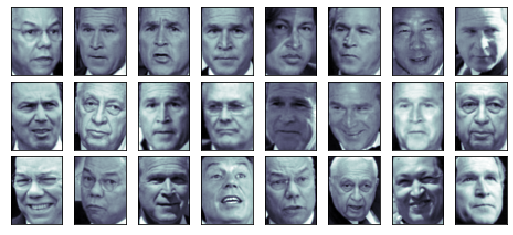

In [62]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.data[i].reshape(62, 47), cmap='bone')

## This large dataset is large, so we will use RandomizedPCA
#### it contains a randomized method to approximate the first N principal components much more quickly than the standard PCA estimator
#### RandomizedPCA is Linear dimensionality reduction using approximated Singular Value Decomposition of the data and keeping only the most significant singular vectors to project the data to a lower dimensional space.
#### We will look different values of K: the numbers "components"

In [124]:
# import RandomizedPCA from decomposition 
from sklearn.decomposition import PCA as RandomizedPCA
# choose first 50 principle component 
K=50
# intiate the RandomizedPCA model with 50 component
pca = RandomizedPCA(K)
# applay it in our data 
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

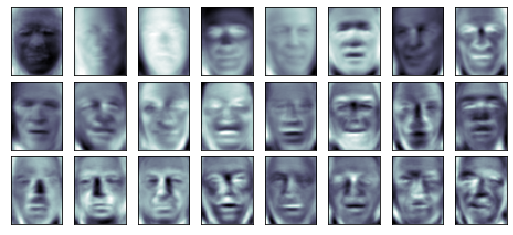

In [125]:
# this image called eigen faces new space that can represent image
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow((pca.components_[i]).reshape(62, 47), cmap='bone')

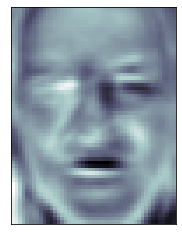

In [126]:
# try to combine all eigen faces =====> we notice that they can almost express alot of feature for faces 
fig, axes = plt.subplots(1, 1, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
all_comp = np.zeros_like(pca.components_[0])
for i in pca.components_:
    all_comp += i
axes.imshow((all_comp).reshape(62, 47), cmap='bone')

In [80]:
# we have 50 eigen vector of covariance matrix which are principle component with 2914 feature
pca.components_.shape

(100, 2914)

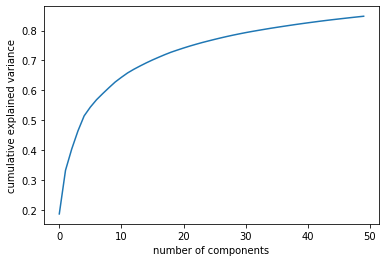

In [93]:
# this figure explain how variance increase compare with number of component 
# at the end of the graph we can notice that the increasing amount gose to be constant
# ====> so component > 50 contribute with  small variance value 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [133]:
#fuction to  Compute the components and projected faces to this components
def projected_faces(k):
    # create model for pca and then apply it to our data
    pca = RandomizedPCA(k).fit(faces.data)
    # fit component to the data and do dimentionality reduction
    components = pca.transform(faces.data)
    # get our data in original space to describe it and see the result 
    projected = pca.inverse_transform(components)
    return projected

In [143]:
# Plot the results
def plot_result(k, projected):
    fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                           subplot_kw={'xticks':[], 'yticks':[]},
                           gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i in range(10):
        ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
        ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')

    ax[0, 0].set_ylabel('full-dim\ninput')
    ax[1, 0].set_ylabel(str(k)+'-dim\nreconstruction');

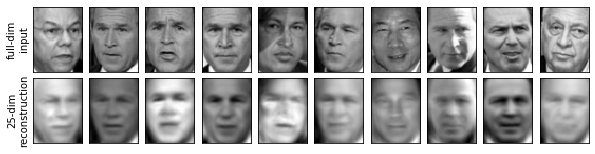

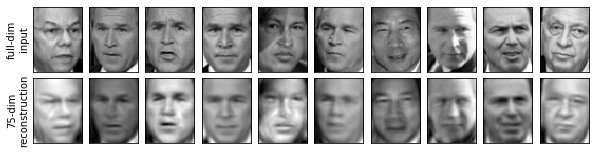

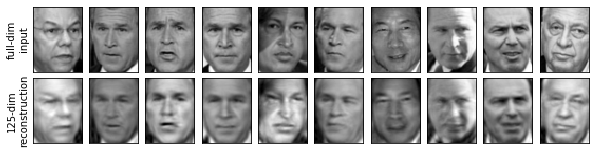

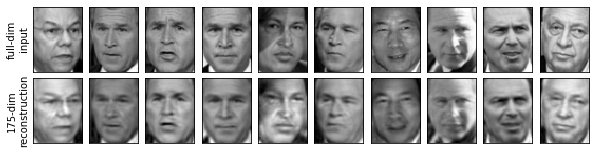

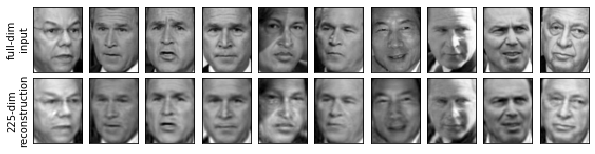

In [145]:
# try k from  25 ===>250
for k in range(25,275,50):
    projected = projected_faces(k)
    plot_result(k, projected)

# --------------------------------------------------------------------------------------------------------------

# Eigen faces using SVD 


# steps
 
(1) We take an image

(2) we convert it in gray scale if necessary

(3) We construct the matrix of pixels, let it be A

(4) We compute the SVD of the matrix, of rank r

(5) We choose k<=r

(6) We construct the Low Rank (k) approximation of A: A_k

(7) We reconstruct the image

In [146]:
#  We take an images from dataset fetch_lfw_people
from sklearn.datasets import fetch_lfw_people # import data set 
faces = fetch_lfw_people(min_faces_per_person=60) 

data contain 1348 image each image with 2914 flatten pixels


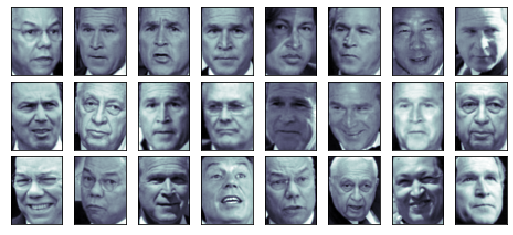

In [153]:
# display our data 
print(f"data contain {faces.data.shape[0]} image each image with {faces.data.shape[1]} flatten pixels")
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.data[i].reshape(62, 47), cmap='bone')

#### we convert it in gray scale if necessary =====> from the above images data already gray scale

#### We construct the matrix of pixels ======> each row of the data consider a flatten matrix of each image 

#### ========================================================================================================

## We compute the SVD of the matrix of data

## $$ A = U S V^T $$

Where:  𝑈 : size  (𝑛,𝑛) , square;  𝑉 : size  (𝑚,𝑚) , square;  𝑆 : size  (𝑛,𝑚) , rectanguler if  𝑛≠𝑚 

In our data n is number of images 1348 and m is number of feature for each image pixels 2914 

The values on the "diagonal" of  𝑆  are called: singular values. The singular values are generally sorted by decreasing order.

The columns of  𝑈  are called the left-singular vectors

The columns of  𝑉  are called the right-singular vectors

In [156]:
# discover our data matrix 
rank = np.linalg.matrix_rank(faces.data)
n, m = faces.data.shape
print("n = ", n)
print("---------------------------------------------")
print("m = ", m)
print("---------------------------------------------")
print("rank = ", rank)
print("---------------------------------------------")

n =  1348
---------------------------------------------
m =  2914
---------------------------------------------
rank =  1108
---------------------------------------------


In [194]:
# compute svd 
U, s, VT = np.linalg.svd(faces.data, full_matrices=True)

In [195]:
print("U shape = ", U.shape)
print("---------------------------------------------")
print("S shape = ", s.shape)
print("---------------------------------------------")
print("VT shape = ", VT.shape)
print("---------------------------------------------")

U shape =  (1348, 1348)
---------------------------------------------
S shape =  (1348,)
---------------------------------------------
VT shape =  (2914, 2914)
---------------------------------------------


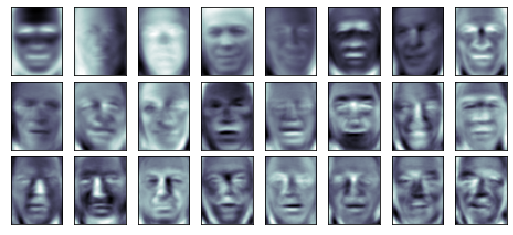

In [196]:
# represent eigen faces ====> row of eigen vector VT
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow((VT[i]).reshape(62, 47), cmap='bone')

In [205]:
# first edit matrix S shape
dia_s = np.diag(s)
column_needed = m - n
additional = np.zeros((n, column_needed))
S = np.hstack([dia_s,additional])
print(dia_s.shape)
print(additional.shape)
print(S.shape)
column_needed

(1348, 1348)
(1348, 1566)
(1348, 2914)


1566

In [207]:
original_data = U @ S @ VT

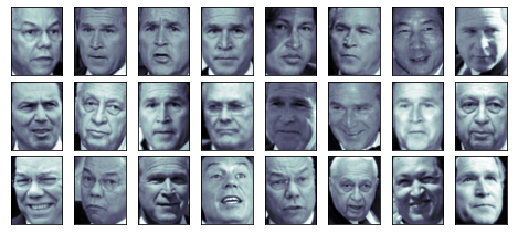

In [208]:
# for check original_data using all singular values and eigen vectors 
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(original_data[i].reshape(62, 47), cmap='bone')

In [221]:
# We construct the Low Rank (k) approximation of faces.data
# We reconstruct the images
def approxi_faces_data(K):
    S_dash = S[:K,:K] # take k singular values 
    VT_dash = VT[:K,:] # take k eigen vectors (row of VT)
    U_dash = U[:,:K] # take projection values of pixels in eigen vectors 
    return U_dash @ S_dash @ VT_dash 

In [222]:
# Plot the results
def plot_result(k, faces_data_dash):
    fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                           subplot_kw={'xticks':[], 'yticks':[]},
                           gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i in range(10):
        ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
        ax[1, i].imshow(faces_data_dash[i].reshape(62, 47), cmap='binary_r')

    ax[0, 0].set_ylabel('full-dim\ninput')
    ax[1, 0].set_ylabel(str(k)+'-dim\nreconstruction');

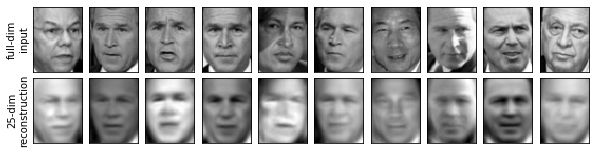

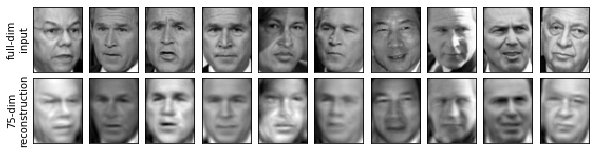

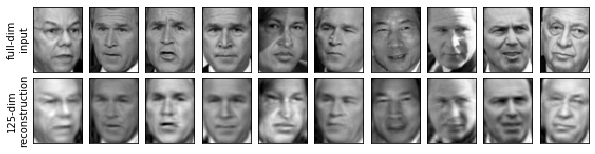

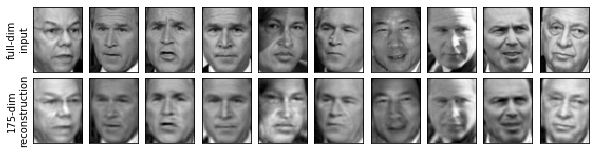

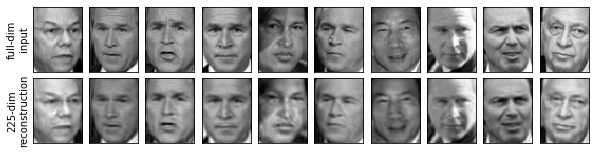

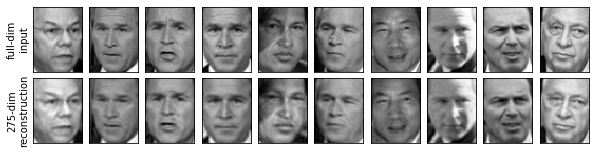

In [224]:
# try k from  25 ===>300
for k in range(25,301,50):
    faces_data_dash = approxi_faces_data(k)
    plot_result(k, faces_data_dash)

In [226]:
# calculate variance ratio
lamda_sum = np.sum(s)
Percentage_of_variance = s / lamda_sum
Percentage_of_variance

array([2.0861714e-01, 2.2242669e-02, 1.5676428e-02, ..., 2.8932844e-05,
       2.8799899e-05, 2.8452299e-05], dtype=float32)

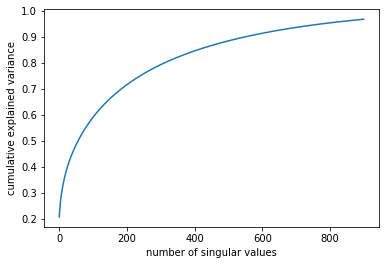

In [237]:
# this figure explain how variance increase compare with number of singular values used
# at the end of the graph we can notice that the increasing amount gose to be constant close to one 
# ====> so number of singular values > 900 contribute with  small variance value 
plt.plot(np.cumsum(Percentage_of_variance[:900]))
plt.xlabel('number of singular values')
plt.ylabel('cumulative explained variance');